In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid', palette='muted', font_scale=1.5)



RANDOM_SEED = 42

In [ ]:
file = open('/content/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  200136


In [ ]:
processedList[:10]

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621']]

In [ ]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
df = pd.DataFrame(data = processedList, columns = columns)
df.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
df.tail()

,user,activity,time,x,y,z
200131,27,Jogging,10934832257000,-6.13,-4.37,5.6252036
200132,27,Jogging,10934882276000,-3.17,-4.14,-7.5865335
200133,27,Jogging,10934932202000,1.84,-4.4,-10.079058
200134,27,Jogging,10934982282000,5.41,-1.38,-5.202973
200135,27,Jogging,10935032239000,8.85,2.34,4.3312707


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming you have already imported necessary libraries and have your data loaded in a DataFrame df

# Encode the 'activity' column to numerical values
label_encoder = LabelEncoder()
df['activity'] = label_encoder.fit_transform(df['activity'])

# Split the data into features (X) and target (y)
X = df[['x', 'y', 'z']]
y = df['activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7075047466773259
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.28      0.34      4172
           1       0.85      0.81      0.83     14501
           2       0.42      0.24      0.30      3996
           3       0.68      0.83      0.75     17359

    accuracy                           0.71     40028
   macro avg       0.60      0.54      0.56     40028
weighted avg       0.69      0.71      0.69     40028



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming you have already imported necessary libraries and have your data loaded in a DataFrame df

# Encode the 'activity' column to numerical values
label_encoder = LabelEncoder()
df['activity'] = label_encoder.fit_transform(df['activity'])

# Split the data into features (X) and target (y)
X = df[['x', 'y', 'z']]
y = df['activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=RANDOM_SEED)

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.6212151493954232
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.27      0.27      4172
           1       0.77      0.79      0.78     14501
           2       0.27      0.28      0.28      3996
           3       0.66      0.64      0.65     17359

    accuracy                           0.62     40028
   macro avg       0.49      0.50      0.49     40028
weighted avg       0.62      0.62      0.62     40028



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Assuming you have already imported necessary libraries and have your data loaded in a DataFrame df

# Encode the 'activity' column to numerical values
label_encoder = LabelEncoder()
df['activity'] = label_encoder.fit_transform(df['activity'])

# Split the data into features (X) and target (y)
X = df[['x', 'y', 'z']]
y = df['activity']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


Accuracy: 0.6553162786049765
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.32      0.32      4172
           1       0.79      0.78      0.79     14501
           2       0.31      0.23      0.26      3996
           3       0.67      0.73      0.70     17359

    accuracy                           0.66     40028
   macro avg       0.53      0.51      0.52     40028
weighted avg       0.64      0.66      0.65     40028



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Assuming you have already imported necessary libraries and have your data loaded in a DataFrame df

# Encode the 'activity' column to numerical values
label_encoder = LabelEncoder()
df['activity'] = label_encoder.fit_transform(df['activity'])

# Split the data into features (X) and target (y)
X = df[['x', 'y', 'z']]
y = df['activity']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Initialize the Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=RANDOM_SEED)

# Train the Logistic Regression classifier
logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.5382482262416308
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4172
           1       0.62      0.56      0.59     14501
           2       0.00      0.00      0.00      3996
           3       0.50      0.77      0.60     17359

    accuracy                           0.54     40028
   macro avg       0.28      0.33      0.30     40028
weighted avg       0.44      0.54      0.48     40028



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Assuming you have already imported necessary libraries and have your data loaded in a DataFrame df

# Encode the 'activity' column to numerical values
label_encoder = LabelEncoder()
df['activity'] = label_encoder.fit_transform(df['activity'])

# Split the data into features (X) and target (y)
X = df[['x', 'y', 'z']]
y = df['activity']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=RANDOM_SEED)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=RANDOM_SEED)

# Train the Gradient Boosting classifier
gradient_boosting.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gradient_boosting.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Generate classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.6806485460177876
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.15      0.23      4172
           1       0.85      0.74      0.79     14501
           2       0.45      0.05      0.09      3996
           3       0.61      0.90      0.73     17359

    accuracy                           0.68     40028
   macro avg       0.61      0.46      0.46     40028
weighted avg       0.67      0.68      0.64     40028



In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=RANDOM_SEED)

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Generate classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.6982861996602379
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.23      0.31      4172
           1       0.86      0.76      0.81     14501
           2       0.45      0.14      0.22      3996
           3       0.64      0.89      0.75     17359

    accuracy                           0.70     40028
   macro avg       0.61      0.50      0.52     40028
weighted avg       0.69      0.70      0.67     40028



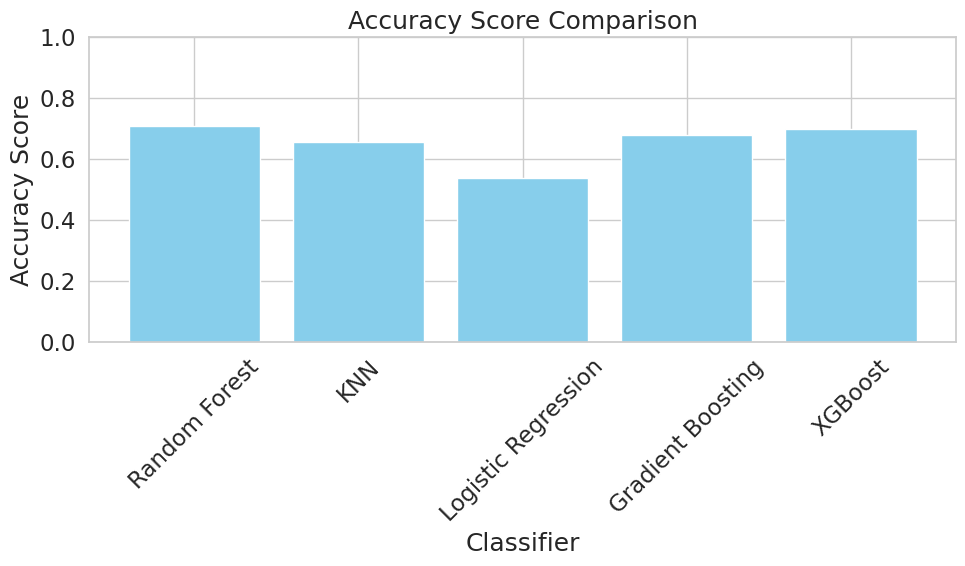

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Assuming you have already imported necessary libraries and have your data loaded in a DataFrame df

# Encode the 'activity' column to numerical values
label_encoder = LabelEncoder()
df['activity'] = label_encoder.fit_transform(df['activity'])

# Split the data into features (X) and target (y)
X = df[['x', 'y', 'z']]
y = df['activity']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=RANDOM_SEED),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_SEED),
    "XGBoost": XGBClassifier(random_state=RANDOM_SEED)
}

# Train and evaluate classifiers
accuracy_scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


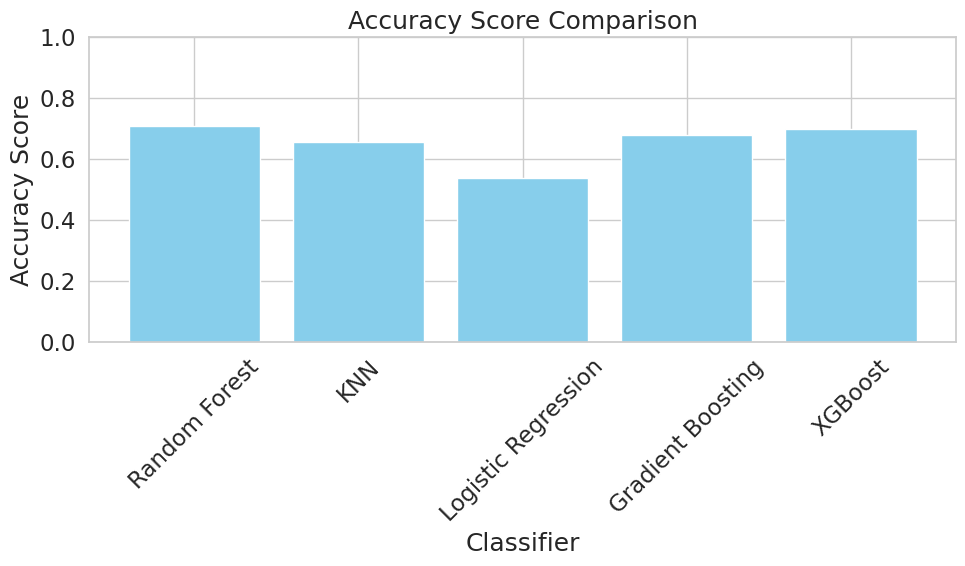

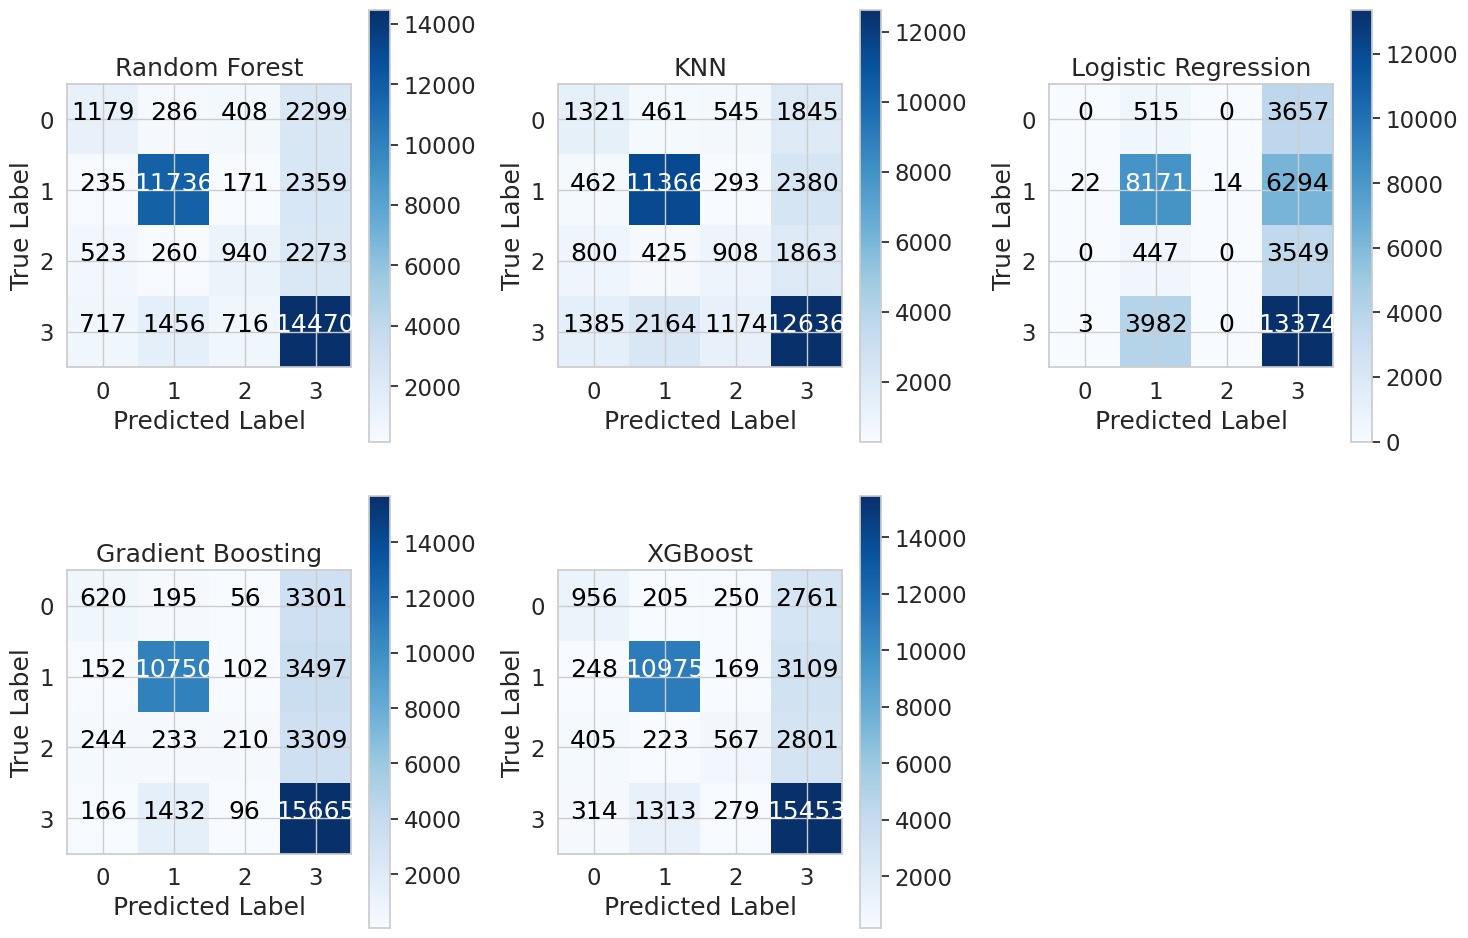

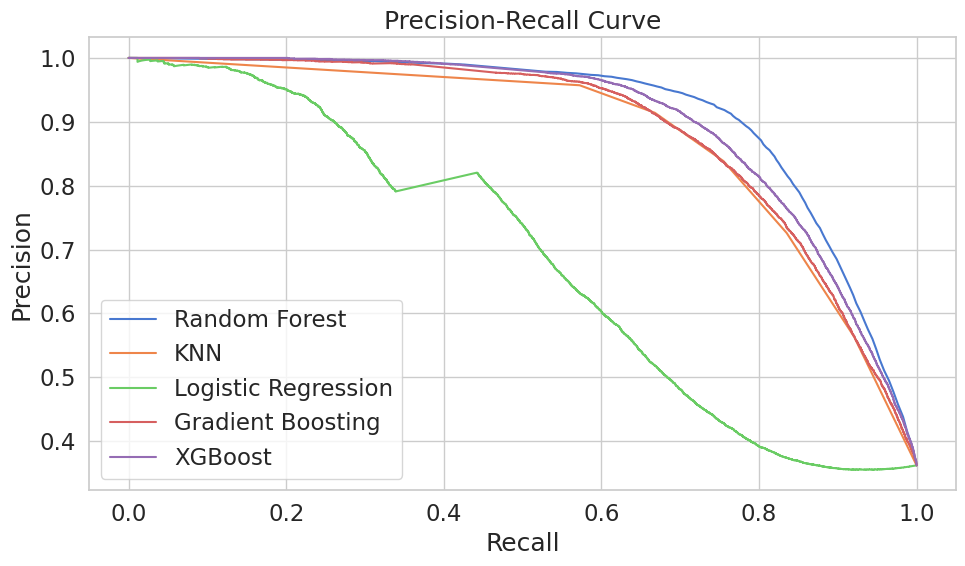

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Assuming you have already imported necessary libraries and have your data loaded in a DataFrame df

# Encode the 'activity' column to numerical values
label_encoder = LabelEncoder()
df['activity'] = label_encoder.fit_transform(df['activity'])

# Split the data into features (X) and target (y)
X = df[['x', 'y', 'z']]
y = df['activity']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=RANDOM_SEED),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_SEED),
    "XGBoost": XGBClassifier(random_state=RANDOM_SEED)
}

# Train and evaluate classifiers
accuracy_scores = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate confusion matrix for each classifier
confusion_matrices = {}
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Plot confusion matrices
plt.figure(figsize=(15, 10))
for i, (name, matrix) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 3, i)
    plt.imshow(matrix, cmap='Blues', interpolation='nearest')
    plt.title(name)
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
    plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
    for i in range(len(label_encoder.classes_)):
        for j in range(len(label_encoder.classes_)):
            plt.text(j, i, format(matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if matrix[i, j] > matrix.max() / 2 else "black")
plt.tight_layout()
plt.show()

# Plot precision-recall curves for each class
plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=label_encoder.classes_[1])
    plt.plot(recall, precision, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


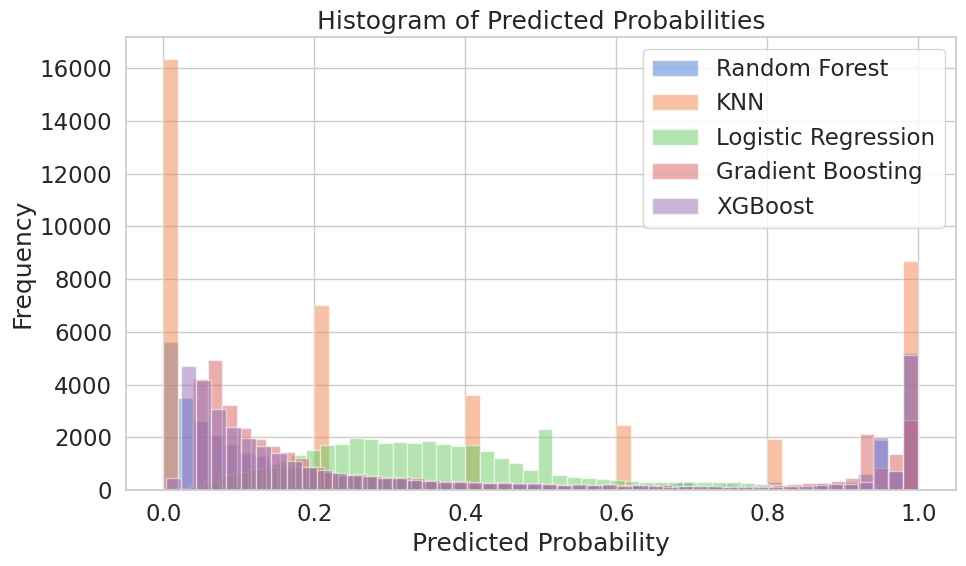

In [ ]:
plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    if hasattr(clf, "predict_proba"):  # Check if the classifier has predict_proba method (for probability estimates)
        plt.hist(clf.predict_proba(X_test)[:, 1], bins=50, alpha=0.5, label=name)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


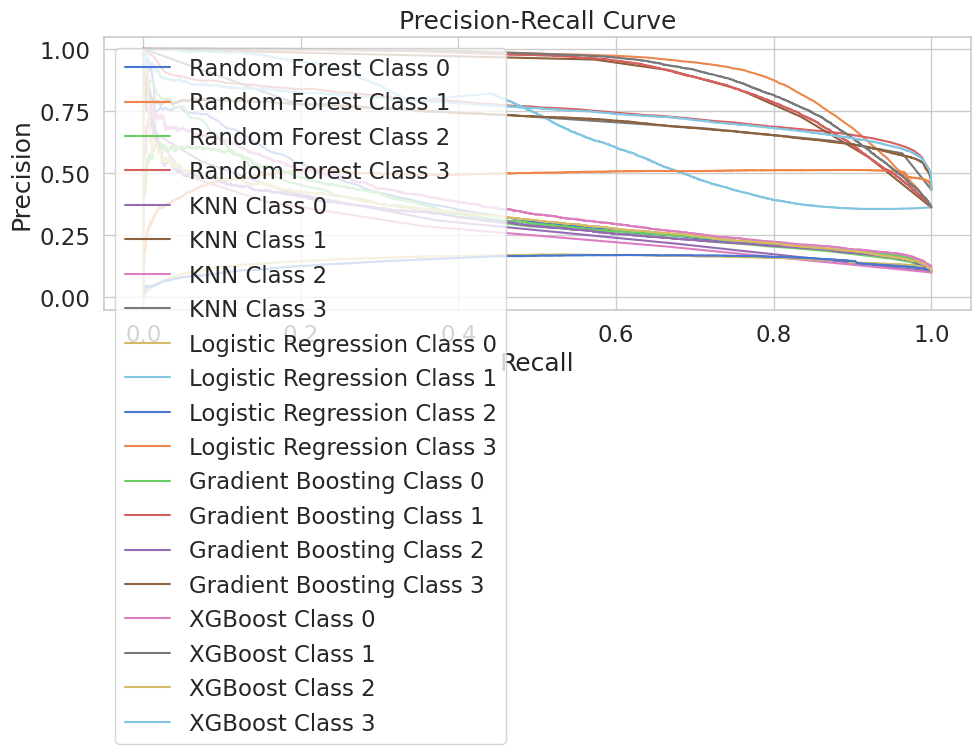

In [ ]:
plt.figure(figsize=(10, 6))
for name, clf in classifiers.items():
    y_score = clf.predict_proba(X_test)
    for i in range(len(label_encoder.classes_)):
        precision, recall, _ = precision_recall_curve(y_test == i, y_score[:, i])
        plt.plot(recall, precision, label=f'{name} Class {label_encoder.classes_[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

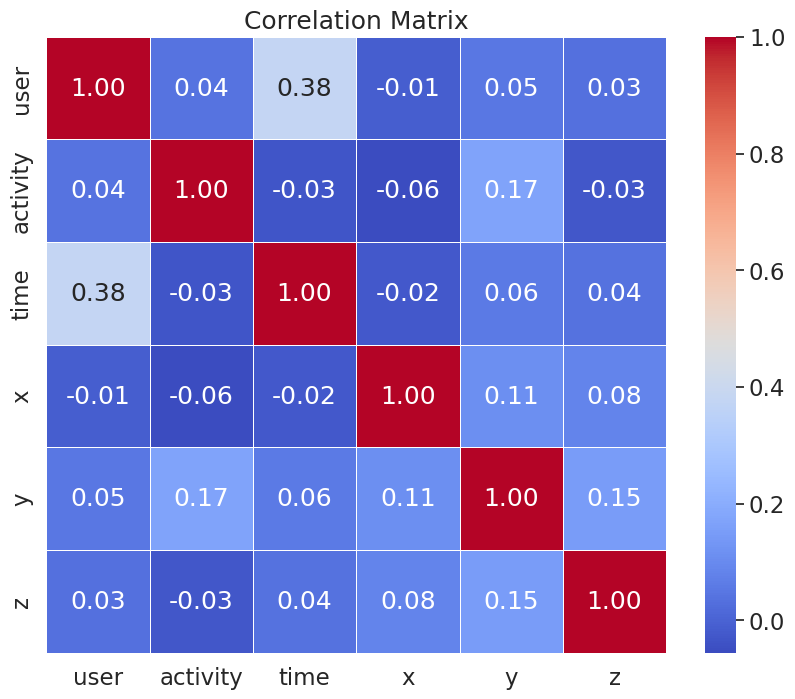

In [ ]:
import pandas as pd
import seaborn as sns

# Assuming your data is stored in a DataFrame called df

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


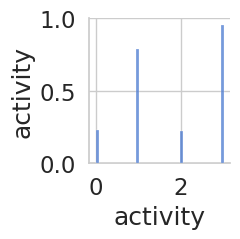

In [ ]:
import seaborn as sns

# Assuming your data is stored in a DataFrame called df
sns.pairplot(df)
plt.show()
